In [1]:
# import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt

kalian bisa menggunakan data yang sudah dibersihkan di

https://github.com/ahikmah/ML-Projects/blob/970fb42f117e49f417cf62a95691947ab8b17574/Predict%20Movie%20Revenue%20-%20Linear%20Regression/datasets/cost_revenue_clean.csv 

atau gunakan milik kalian sendiri

In [2]:
# import data yang telah dibersihkan sebelumnya
df = pd.read_csv('datasets/cost_revenue_clean.csv')
df

,production_budget_usd,worldwide_gross_usd
0,110000,11000000
1,200000,8000000
2,100000,3000000
3,245000,22000000
4,3900000,9000000
...,...,...
5029,55000000,376856949
5030,40000000,166893990
5031,185000000,561137727
5032,175000000,140012608


Kita dapat memanggil fungsi describe() untuk mendapatkan ringkasan statistik dari data kita

In [3]:
df.describe()

,production_budget_usd,worldwide_gross_usd
count,5.034000e+03,5.034000e+03
mean,3.290784e+07,9.515685e+07
std,4.112589e+07,1.726012e+08
min,1.100000e+03,2.600000e+01
25%,6.000000e+06,7.000000e+06
50%,1.900000e+07,3.296202e+07
75%,4.200000e+07,1.034471e+08
max,4.250000e+08,2.783919e+09


Angka di atas ditulis menggunakan notasi saintifik. Jika kalian bingung berapa nilai aslinya, kalian bisa menggunakan cara di bawah. Sebagai contoh saya menggunakan nilai **count**

In [4]:
5.034000e3

5034.0

Seperti yang telah saya singgung sebelumnya, kita akan mencari fungsi terbaik untuk memetakan input variable (production_budget_usd) ke dalam output variable / target (worldwide_gross_usd)

#  *y = f(X)*

Dimana,

X = input -> production_budget_usd
y = target -> worldwide_gross_usd


---

Untuk itu, saya akan menyimpan data **production_budget_usd** ke dalam variabel **X**, dan **worldwide_gross_usd** ke dalam variabel **y**

In [5]:
X = df['production_budget_usd']
y = df['worldwide_gross_usd']

# Plotting Data
Selanjutnya, kita akan memvisualisasikan data kita ke dalam scatter diagram

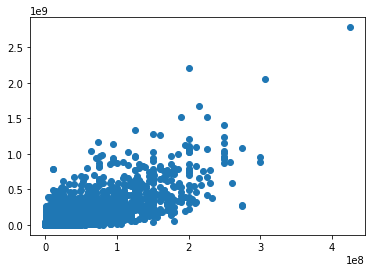

In [6]:
plt.scatter(X, y);

Supaya lebih deskriptif, maka kita akan menambahkan judul, dan label pada masing-masing sumbu x dan y

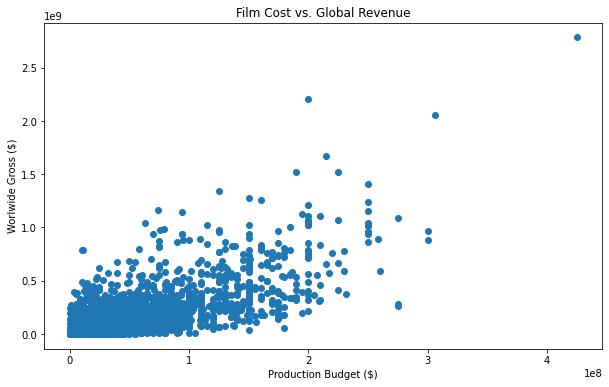

In [7]:
plt.figure(figsize=(10,6)) # untuk mengatur ukuran diagram
plt.scatter(X, y)
plt.title('Film Cost vs. Global Revenue')
plt.xlabel('Production Budget ($)')
plt.ylabel('Worlwide Gross ($)')
plt.show()

Supaya lebih rapi, kita akan melakukan sedikit kustomisasi pada diagram tersebut. Jika kita lihat, baik di sumbu x dan y, masih terdapat space kosong antara garis dan datanya. Hal tersebut terjadi karena pada sumbu tersebut terdapat nilai negative, sementara pada data kita nilai minimumnya tidak ada yang mencapai angka negatif.

*lihat pada data yang ditampilkan df.describe() untuk melihat nilai maksimum dan minimumnya.*

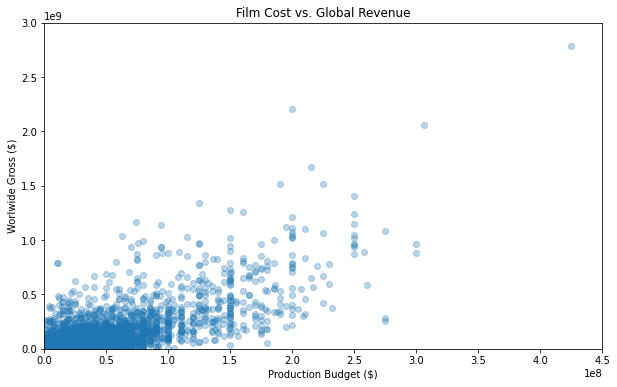

In [8]:
plt.figure(figsize=(10,6)) # untuk mengatur ukuran diagram
plt.scatter(X, y, alpha=0.3) # alpha : untuk membuat efek transparant
plt.title('Film Cost vs. Global Revenue')
plt.xlabel('Production Budget ($)')
plt.ylabel('Worlwide Gross ($)')

plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)

plt.show()

Kita bisa lihat di atas, film dengan biaya produksi paling tinggi mendapatkan penghasilan paling tinggi pula. Namun ada juga beberapa film lain yang mendapatkan pendapatan lebih tinggi meskipun anggarannya lebih rendah.

Selanjutnya, kita akan mengimplementasikan Linear Regression agar mesin dapat mempelajari bagaimana relasi antara anggaran dan pendapatan dari sebuah film